In [152]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#import librosa
import os
import sys
import hdf5_getters
import numpy as np
from dtw import dtw
from numpy.linalg import norm

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [153]:
def norm2(x, y):
    return norm(x - y, ord=2)

def get_song_info(h5):
    print '%s - %s | (%s) | %s bpm' % (hdf5_getters.get_artist_name(h5), hdf5_getters.get_title(h5), hdf5_getters.get_year(h5), hdf5_getters.get_tempo(h5))

In [154]:
h5list = []
folder = './data/B/F/R/'

for f in os.listdir(folder):
    h5list.append(hdf5_getters.open_h5_file_read(folder+f))
    get_song_info(h5list[-1])

Less Than Jake - Automatic | (1996) | 133.05 bpm
Anti-Flag - I Don't Wanna be a War Hero | (2003) | 106.065 bpm
Pelt - Bestio Tergum Degero Pt. 3 | (0) | 87.46 bpm
Lupe Fiasco - Kick_ Push II (Album Version) | (0) | 85.015 bpm
Her Majesty's Finest - Snapshot Samurai | (0) | 139.878 bpm
Tyrone Taylor - True Love | (0) | 174.33 bpm
Kuijken Kwartet - Introitus: Requiem: Dies Irae | (0) | 135.759 bpm
T.G. Sheppard - You're My First Lady | (1992) | 157.968 bpm
Dr. Elmo - Christmas Won't be the Same Without Johnny | (0) | 98.508 bpm
David Jalbert - Nocturne For Piano No. 5 In B Flat Major_ Op. 37 | (0) | 90.19 bpm
Julien Clerc - Ma Préférence (Live) | (1994) | 97.007 bpm
The Jason Bonham Band - Hold On | (1992) | 142.26 bpm
Busta Rhymes - We Got What You Want | (2001) | 176.83 bpm


In [155]:
x = hdf5_getters.get_segments_pitches(h5list[0])
y = hdf5_getters.get_segments_pitches(h5list[-4])
get_song_info(h5list[0])
get_song_info(h5list[-4])

Less Than Jake - Automatic | (1996) | 133.05 bpm
David Jalbert - Nocturne For Piano No. 5 In B Flat Major_ Op. 37 | (0) | 90.19 bpm


In [156]:
dist, cost, path = dtw(x, y, dist=norm2)
print 'Minimum distance:', dist

Minimum distance: 0.85226107739


<matplotlib.colorbar.Colorbar instance at 0x188a7ec68>

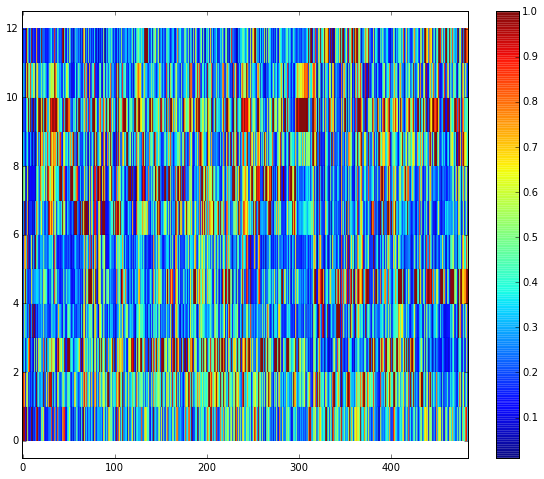

In [157]:
# plt.imshow(x.T, aspect='auto', origin='lower', cmap='spectral')
plt.pcolor(x.T, cmap=plt.cm.jet, alpha=0.8)
plt.xlim((-0.5, x.shape[0]+0.5))
plt.ylim((-0.5, x.shape[1]+0.5))
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x1897e1fc8>

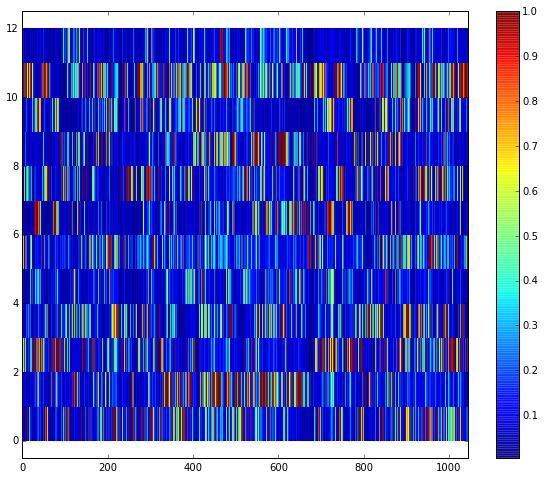

In [158]:
#plt.imshow(y.T, aspect='auto', origin='lower', cmap='spectral')
plt.pcolor(y.T, cmap=plt.cm.jet, alpha=0.8)
plt.xlim((-0.5, y.shape[0]+0.5))
plt.ylim((-0.5, y.shape[1]+0.5))
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x18a6616c8>

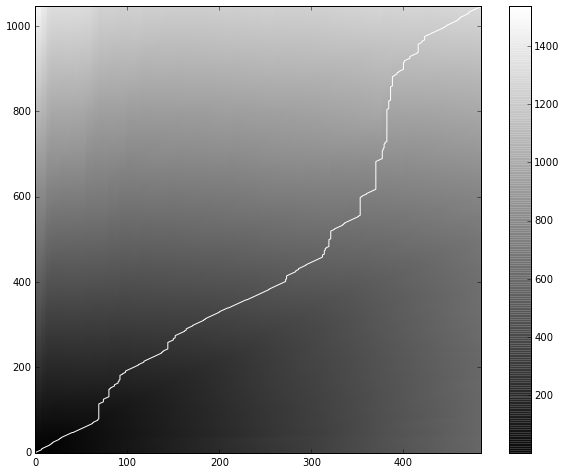

In [159]:
plt.pcolor(cost.T, cmap=plt.cm.gray, alpha=0.8)
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]+0.5))
plt.ylim((-0.5, cost.shape[1]+0.5))
plt.colorbar()